In [ ]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import cmath

Array of energy levels, E= [2.29417278e-22 9.17474321e-22 2.06358691e-21 3.66678191e-21
 5.72569806e-21 8.23858713e-21 1.12033154e-20 1.46173654e-20
 1.84778382e-20 2.27814556e-20 2.75245629e-20 3.27031323e-20
 3.83127660e-20 4.43486998e-20 5.08058074e-20 5.76786045e-20
 6.49612535e-20 7.26475682e-20 8.07310195e-20 8.92047402e-20
 9.80615312e-20 1.07293868e-19 1.16893905e-19 1.26853484e-19
 1.37164143e-19 1.47817118e-19 1.58803354e-19 1.70113512e-19
 1.81737976e-19 1.93666863e-19 2.05890030e-19 2.18397080e-19
 2.31177375e-19 2.44220044e-19 2.57513989e-19 2.71047899e-19
 2.84810253e-19 2.98789336e-19 3.12973247e-19 3.27349907e-19
 3.41907070e-19 3.56632332e-19 3.71513147e-19 3.86536829e-19
 4.01690568e-19 4.16961439e-19 4.32336413e-19 4.47802369e-19
 4.63346102e-19 4.78954335e-19 4.94613731e-19 5.10310903e-19
 5.26032425e-19 5.41764841e-19 5.57494681e-19 5.73208466e-19
 5.88892721e-19 6.04533985e-19 6.20118824e-19 6.35633835e-19
 6.51065663e-19 6.66401005e-19 6.81626618e-19 6.96729331e-

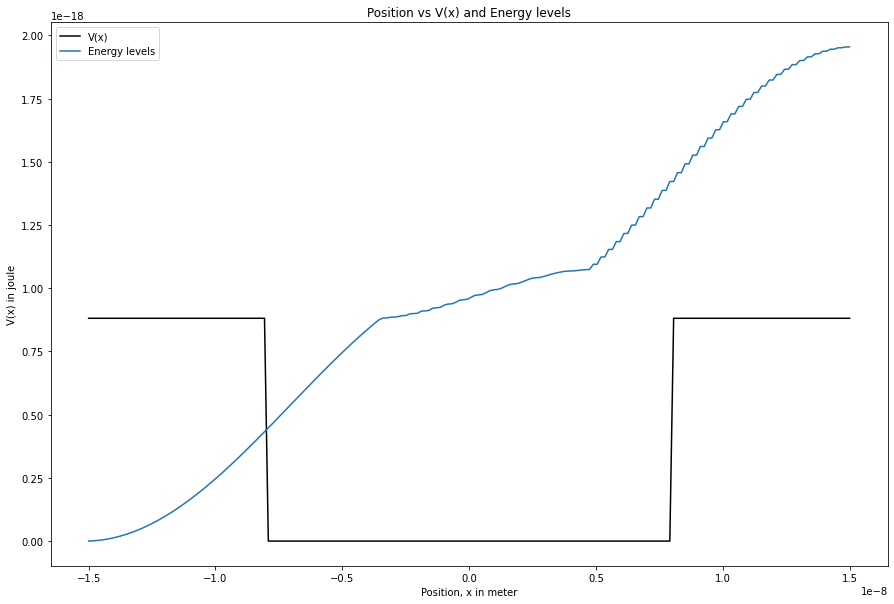

In [21]:
#given information 


m=9.11*10**-31 #kg
h_c=1.0546*10**-34 #Js
L=8*10**-9 #m
r=15*10**-9 #m
Vo=8.812*10**-19 #J
N=200 #sampling points

x=np.linspace(-r,r,N)  

V_x=np.zeros(N)  # defining the given condition 
for i in range(N):
    if x[i]>= -L and x[i]<= L:   # V(x) 0 when -L<=x<=L
      V_x[i] = 0
    else:
      V_x[i] = Vo  #otherwise V(x) = 0 

#print(V_x)

h = x[1] - x[0]  # differential difference 

matrix_1 = 1/h*(np.diag( -1*np.ones(N),0) + np.diag(np.ones(N-1),1))  # 1st order differential matrix 

matrix_2 = 1/(h**2)*( np.diag(np.ones(N-1),-1) +(-2*np.diag(np.ones(N),0)) + np.diag(np.ones(N-1),1) ) # 2nd order differential matrix

# After transforming the given equation 
eq = np.diag(V_x) - ((h_c**2)*matrix_2)/(2*m)

#Eigen value and eigen matrix
#E_le will be eigen value and define the energy levels 
E_le,T_WF = np.linalg.eigh(eq)
WF = np.transpose(T_WF) # WF is the wave function which defined by Ψ

print("Array of energy levels, E=", E_le)

sort = np.sort(E_le) # arranging the energy levels from minimum to maximum
min_E_le = (np.min(sort))
max_E_le = (np.max(sort))
print('Ground energy level,  min_E_le = ', min_E_le)
print('Valence energy level, max_E_le = ', max_E_le)


plt.figure(1,figsize=(15,10))
plt.plot(x,V_x,'black',label='V(x)')
plt.plot(x,E_le,label='Energy levels')
plt.xlabel("Position, x in meter")
plt.ylabel("V(x) in joule")
plt.title("Position vs V(x) and Energy levels")
plt.legend(loc=2)

Ground State= 1.9544238802572336e-18


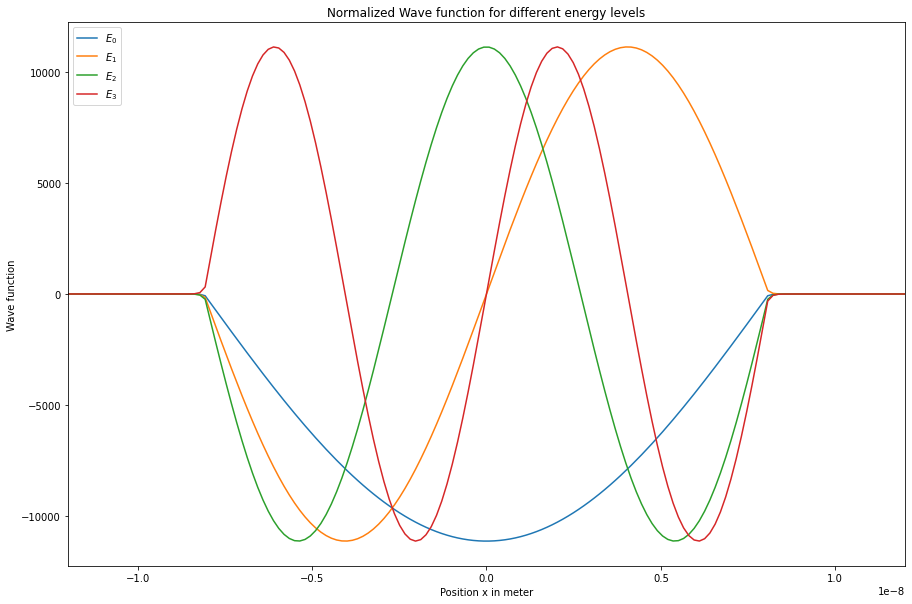

In [24]:
#Task 2

print('Ground State=', np.max(E_le))
plt.figure(2,figsize=(15,10))
for i in range(4):
    if E_le[i]>0:                 
        if WF[i][N-1] == np.min(E_le): #For plotting the minimum or ground energy level wave 
            plt.plot(x,WF[i]/(np.sqrt(h)),label="$E_{}$ ".format(i,E_le[i]))
        else:
          plt.plot(x,WF[i]/(np.sqrt(h)),label="$E_{}$".format(i,E_le[i])) #For plotting another 3 wave
plt.xlim([-1.5*L,1.5*L])
plt.xlabel("Position x in meter")
plt.ylabel("Wave function")
plt.title('Normalized Wave function for different energy levels')
plt.legend(loc=2)
plt.show()